In [1]:
import matplotlib.pyplot as plt
import matplotlib
import pickle
import os
import numpy as np
import pandas as pd
from sklearn.metrics import roc_curve, auc, roc_auc_score
from itertools import cycle, islice
import sklearn.metrics as metrics
import seaborn as sns
import pprint

In [2]:
pf_datapath = 'logs/08-Mar-2021_18_56_12'
pf_test_metadata = 'saved/DeepFakeDetectModel/Test/video_classi_0.8_0.6_0.3'

mri_datapath = 'logs/08-Mar-2021_07_53_22' # MRI-GAN from logs/23-Feb-2021_21_22_21, tau=0.3
mri_test_metadata = 'saved/DeepFakeDetectModel/Test/video_classi_0.7_0.6_0.3'

#mri_datapath = 'logs/07-Mar-2021_19_12_06' # MRI_GAN from 04-Mar-2021_09_12_48 (tau=0.7)
#mri_test_metadata = 'saved/DeepFakeDetectModel/Test/video_classi_0.55_0.6_0.5'


In [3]:
pf_train_acc_path = os.path.join(pf_datapath, 'latest_epoch/DeepFakeDetectModel/Train/model_acc.log')
pf_valid_acc_path = os.path.join(pf_datapath, 'latest_epoch/DeepFakeDetectModel/Validation/model_acc.log')
pf_train_loss_path = os.path.join(pf_datapath, 'latest_epoch/DeepFakeDetectModel/Train/model_losses.log')
pf_valid_loss_path = os.path.join(pf_datapath, 'latest_epoch/DeepFakeDetectModel/Validation/model_losses.log')

mri_train_acc_path = os.path.join(mri_datapath, 'latest_epoch/DeepFakeDetectModel/Train/model_acc.log')
mri_valid_acc_path = os.path.join(mri_datapath, 'latest_epoch/DeepFakeDetectModel/Validation/model_acc.log')
mri_train_loss_path = os.path.join(mri_datapath, 'latest_epoch/DeepFakeDetectModel/Train/model_losses.log')
mri_valid_loss_path = os.path.join(mri_datapath, 'latest_epoch/DeepFakeDetectModel/Validation/model_losses.log')


In [4]:
with open(pf_train_acc_path, "rb") as f:
    pf_train_acc = pickle.load(f)
with open(pf_valid_acc_path, "rb") as f:
    pf_valid_acc = pickle.load(f)
with open(pf_train_loss_path, "rb") as f:
    pf_train_loss = pickle.load(f)
with open(pf_valid_loss_path, "rb") as f:
    pf_valid_loss = pickle.load(f)
    
with open(mri_train_acc_path, "rb") as f:
    mri_train_acc = pickle.load(f)
with open(mri_valid_acc_path, "rb") as f:
    mri_valid_acc = pickle.load(f)
with open(mri_train_loss_path, "rb") as f:
    mri_train_loss = pickle.load(f)
with open(mri_valid_loss_path, "rb") as f:
    mri_valid_loss = pickle.load(f)

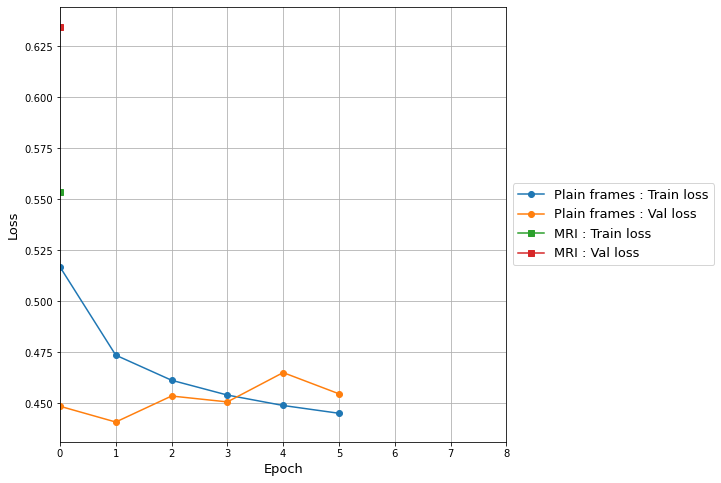

In [5]:
epoch = len(pf_train_acc)
fig = plt.figure(figsize=(8, 8))

plt.xlabel('Epoch', fontsize=13)
plt.ylabel('Loss',fontsize=13)
plt.xlim(0, epoch + 2)

plt.plot(pf_train_loss, marker='o', label='Plain frames : Train loss')
plt.plot(pf_valid_loss, marker='o', label='Plain frames : Val loss')

plt.plot(mri_train_loss, marker='s', label='MRI : Train loss')
plt.plot(mri_valid_loss, marker='s', label='MRI : Val loss')

plt.gca().legend(loc='center left', bbox_to_anchor=(1, 0.5),fontsize=13)
plt.grid(True)
plt.savefig('Acc_plot.png')

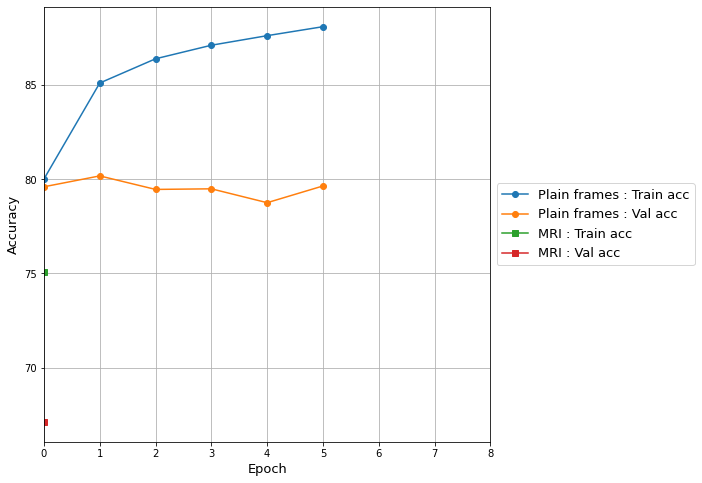

In [6]:
epoch = len(pf_train_acc)
fig = plt.figure(figsize=(8, 8))

plt.xlabel('Epoch', fontsize=13)
plt.ylabel('Accuracy',fontsize=13)
matplotlib.rc('xtick', labelsize=13) 
matplotlib.rc('ytick', labelsize=13)

plt.xlim(0, epoch + 2)
plt.plot(pf_train_acc, marker='o', label='Plain frames : Train acc')
plt.plot(pf_valid_acc, marker='o', label='Plain frames : Val acc')

plt.plot(mri_train_acc, marker='s', label='MRI : Train acc')
plt.plot(mri_valid_acc, marker='s', label='MRI : Val acc')

plt.gca().legend(loc='center left', bbox_to_anchor=(1, 0.5),fontsize=13)
plt.grid(True)

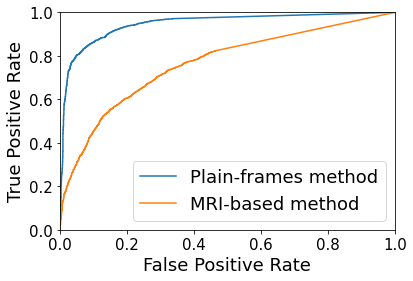

In [7]:
pf_all_samples_pred_csv = os.path.join(pf_datapath,pf_test_metadata ,'all_samples_pred.csv')
pf_final_df = pd.read_csv(pf_all_samples_pred_csv)

pf_ground_truth = pf_final_df['ground_truth'].to_numpy()
pf_probability = pf_final_df['fake_prob'].to_numpy()

pf_fpr = dict()
pf_tpr = dict()
pf_roc_auc = dict()
for i in range(2):
    pf_fpr[i], pf_tpr[i], _ = roc_curve(pf_ground_truth, pf_probability)
    pf_roc_auc[i] = auc(pf_fpr[i], pf_tpr[i])


mri_all_samples_pred_csv = os.path.join(mri_datapath, mri_test_metadata,'all_samples_pred.csv')
mri_final_df = pd.read_csv(mri_all_samples_pred_csv)

mri_ground_truth = mri_final_df['ground_truth'].to_numpy()
mri_probability = mri_final_df['fake_prob'].to_numpy()

mri_fpr = dict()
mri_tpr = dict()
mri_roc_auc = dict()
for i in range(2):
    mri_fpr[i], mri_tpr[i], _ = roc_curve(mri_ground_truth, mri_probability)
    mri_roc_auc[i] = auc(mri_fpr[i], mri_tpr[i])

#fig = plt.figure()
fig, ax = plt.subplots()
plt.plot(pf_fpr[1], pf_tpr[1], label='Plain-frames method')
plt.plot(mri_fpr[1], mri_tpr[1], label='MRI-based method')

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate',fontsize=18)
plt.ylabel('True Positive Rate',fontsize=18)
#plt.gca().legend(loc='center left', bbox_to_anchor=(1, 0.5),fontsize=13)
plt.gca().legend(fontsize=18)


# We change the fontsize of minor ticks label 
ax.tick_params(axis='both', which='major', labelsize=15)
ax.tick_params(axis='both', which='minor', labelsize=15)


mri_roc_auc = round(roc_auc_score(mri_ground_truth, mri_probability),2)
pf_roc_auc = round(roc_auc_score(pf_ground_truth, pf_probability),2)

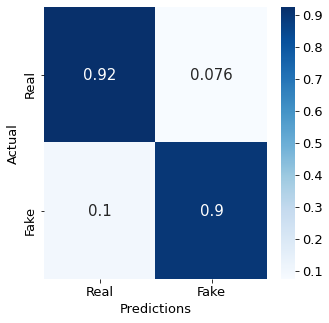

In [8]:
target_class_names = ['Real', 'Fake']
cmap = plt.cm.Blues
plot_x_label = "Predictions"
plot_y_label = "Actual"
plt.rcParams['font.size'] = 15
pf_cm = metrics.confusion_matrix(pf_final_df['ground_truth'], pf_final_df['prediction'], normalize='true')
df_confusion = pd.DataFrame(pf_cm)
df_confusion.index = target_class_names
df_confusion.columns = target_class_names
df_confusion = df_confusion.round(4)
fig = plt.figure(figsize=(5, 5))
sns.heatmap(df_confusion, annot=True, cmap=cmap)
plt.xlabel(plot_x_label,fontsize=13)
plt.ylabel(plot_y_label, fontsize=13)
fig.savefig('confusion_matrix_pf.png')

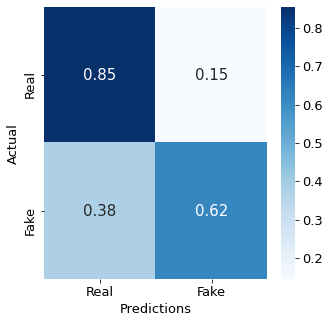

In [9]:
mri_cm = metrics.confusion_matrix(mri_final_df['ground_truth'], mri_final_df['prediction'], normalize='true')
df_confusion = pd.DataFrame(mri_cm)
df_confusion.index = target_class_names
df_confusion.columns = target_class_names
df_confusion = df_confusion.round(4)
fig = plt.figure(figsize=(5, 5))
sns.heatmap(df_confusion, annot=True, cmap=cmap)
plt.xlabel(plot_x_label,fontsize=13)
plt.ylabel(plot_y_label, fontsize=13)


fig.savefig('confusion_matrix_mri.png')

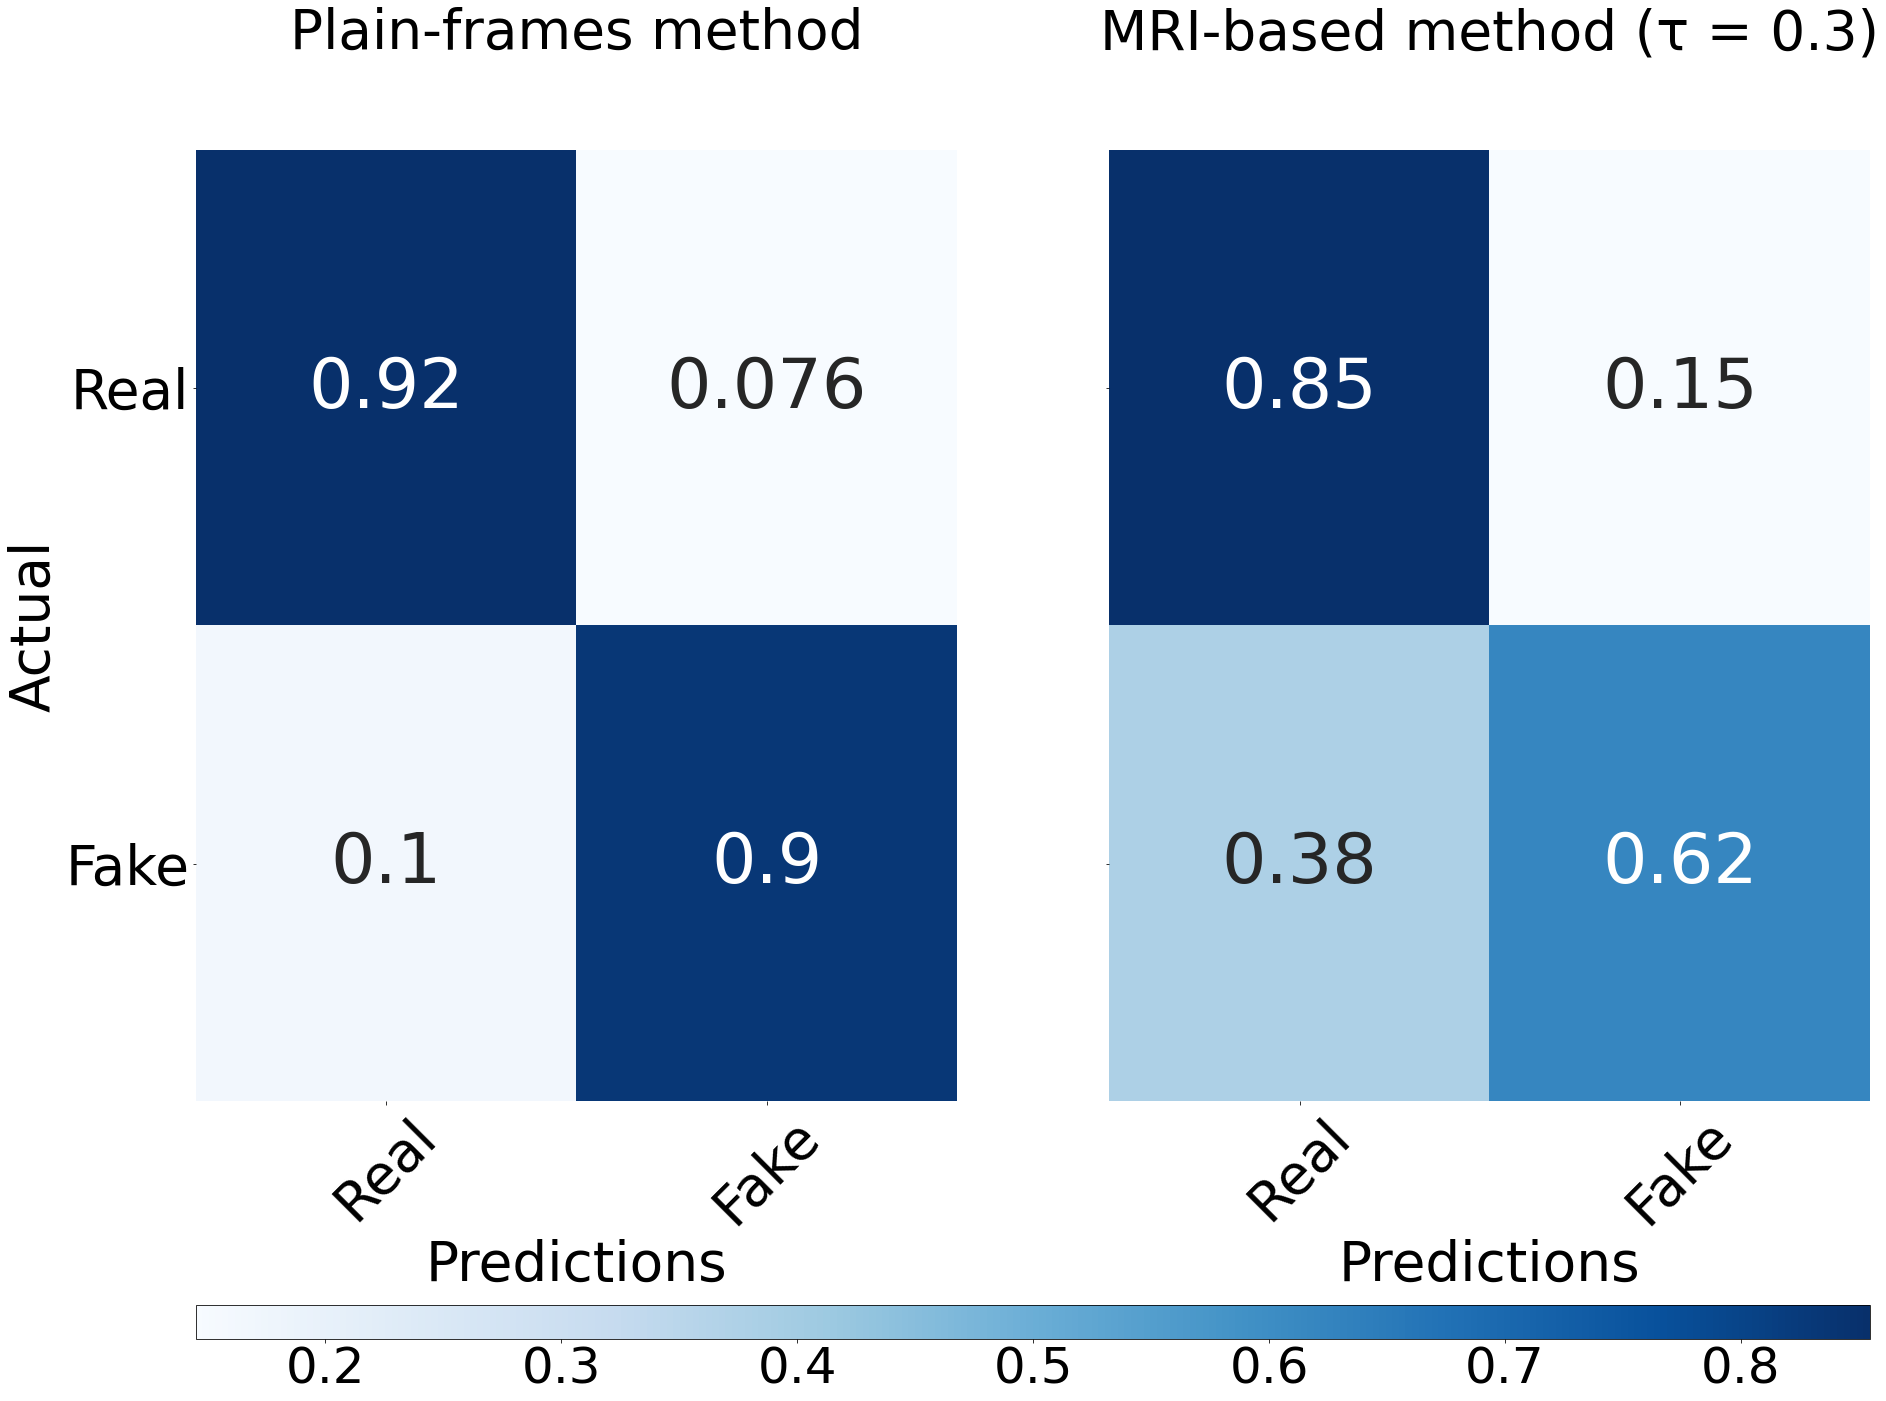

In [10]:
PF_cm_dir = os.path.join(pf_datapath, pf_test_metadata)
MRI_cm_dir = os.path.join(mri_datapath, mri_test_metadata)

PF_cm_file = os.path.join(PF_cm_dir,'confusion_matrix_normalized.csv')
MRI_cm_file = os.path.join(MRI_cm_dir,'confusion_matrix_normalized.csv')


PF_cm_df = pd.read_csv(PF_cm_file,index_col=0)
MRI_cm_df = pd.read_csv(MRI_cm_file,index_col=0)

plot_x_label = "Predictions"
plot_y_label = "Actual"
class_names = ['Real', 'Fake']

greek_letterz = [chr(code) for code in range(945, 970)]
tau_str = greek_letterz[19]
mri_cm_str = 'MRI-based method (' + tau_str + ' = 0.3)'
cmap = plt.cm.Blues

fontsize_text = 55
fontsize_num = 70
fig, ax = plt.subplots(1,2, figsize=(30,25))
g = sns.heatmap(PF_cm_df, annot=True, cmap=cmap,ax=ax[0],cbar=False,annot_kws={"fontsize":fontsize_num})
ax[0].set_title('Plain-frames method', fontsize = fontsize_text, y=1.1)
ax[0].set_xlabel(plot_x_label,fontsize=fontsize_text)
ax[0].set_ylabel(plot_y_label,fontsize=fontsize_text)
g.set_yticklabels(g.get_yticklabels(), rotation = 0, fontsize = fontsize_text)
g.set_xticklabels(g.get_xticklabels(), rotation = 45, fontsize = fontsize_text)
    
g= sns.heatmap(MRI_cm_df, annot=True, cmap=cmap,ax=ax[1],cbar=False,annot_kws={"fontsize":fontsize_num})
ax[1].set_title(mri_cm_str, fontsize = fontsize_text,y=1.1)
ax[1].set_xlabel(plot_x_label,fontsize=fontsize_text)
#ax[1].set_ylabel(plot_y_label,fontsize=fontsize_text)
ax[1].set_ylabel('',fontsize=fontsize_text)

#g.set_yticklabels(g.get_yticklabels(), rotation = 0, fontsize = fontsize_text)
g.set_yticklabels('', rotation = 0, fontsize = fontsize_text)
g.set_xticklabels(g.get_xticklabels(), rotation = 45, fontsize = fontsize_text)
mappable = g.get_children()[0]
cb = plt.colorbar(mappable, ax = [ax[0],ax[1]],orientation = 'horizontal',aspect=50)
cb.ax.tick_params(labelsize=50) 

plt.show()



fig.savefig('confusion_matrix_combined.png')


In [11]:
def get_rates(conf):
    tp = conf[0,0]
    fp = conf[0,1]
    fn = conf[1,0]
    tn = conf[1,1]
    dict_metric = dict()
    dict_metric["TPR"] = round(tp / (tp + fn),2)
    dict_metric["FNR"] = round(fn / (tp + fn),2)
    dict_metric["FPR"] = round(fp / (fp + tn),2)
    dict_metric["TNR"] = round(tn / (fp + tn),2)
    dict_metric["ACC"] = round((tp+tn)/(tp+tn+fp+fn),2)
    dict_metric["BAL ACC"] = round((dict_metric["TPR"] + dict_metric["TNR"] )/2,2)
    dict_metric["F1"] = round(2*tp/(2*tp+fp+fn),2)
    dict_metric["Precision"] = round(tp/(tp+fp),2)
    dict_metric["Specificity"] = round(tn/(tn+fp),2)
    return dict_metric

pf_rates=get_rates(pf_cm)
pf_rates['AUC ROC'] = pf_roc_auc
mri_rates=get_rates(mri_cm)
mri_rates['AUC ROC'] = mri_roc_auc
pf_rates_df = pd.DataFrame.from_dict(pf_rates,orient='index',
                       columns=['Plain-frames method'])
mri_rates_df = pd.DataFrame.from_dict(mri_rates,orient='index',
                       columns=['MRI method'])

df = pd.concat([pf_rates_df,mri_rates_df], axis=1)
df

,Plain-frames method,MRI method
TPR,0.90,0.69
FNR,0.10,0.31
FPR,0.08,0.19
TNR,0.92,0.81
ACC,0.91,0.74
BAL ACC,0.91,0.75
F1,0.91,0.77
Precision,0.92,0.85
Specificity,0.92,0.81
AUC ROC,0.95,0.76
